In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline
# %matplotlib qt

In [2]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt (2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

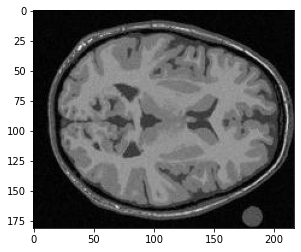

In [3]:
I = cv2.imread('subject05_80.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
nf,nc=I.shape
plt.imshow(I,cmap='gray')

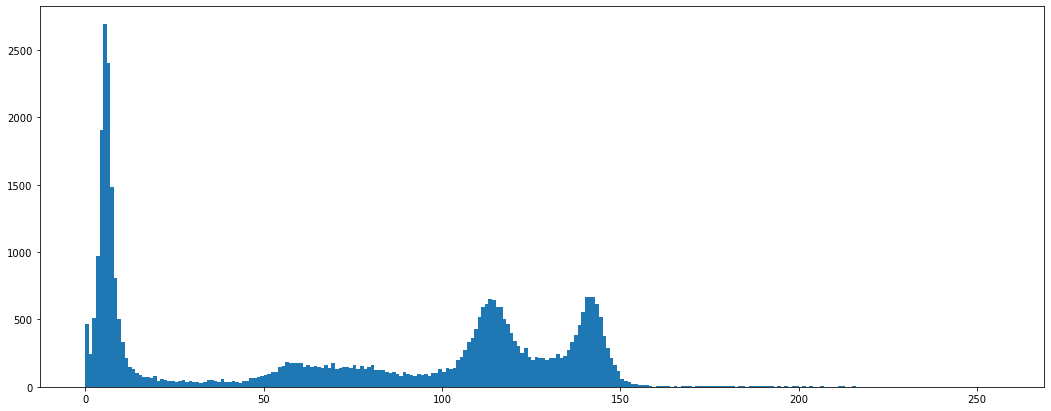

In [4]:
fig1=plt.figure(figsize = (18,7))
plt.hist(I.ravel(),256,[0,256]); 
plt.show()

In [5]:
nm=4 #number of models
phi=np.ones([nm,])/nm
med=random.sample(range(0, 255), nm) #initializing means randomly
med=np.linspace(30,150,nm)
devstd= np.ones([nm,])*5 #initializing standar desviation with 2
print(med,devstd)

[ 30.  70. 110. 150.] [5. 5. 5. 5.]


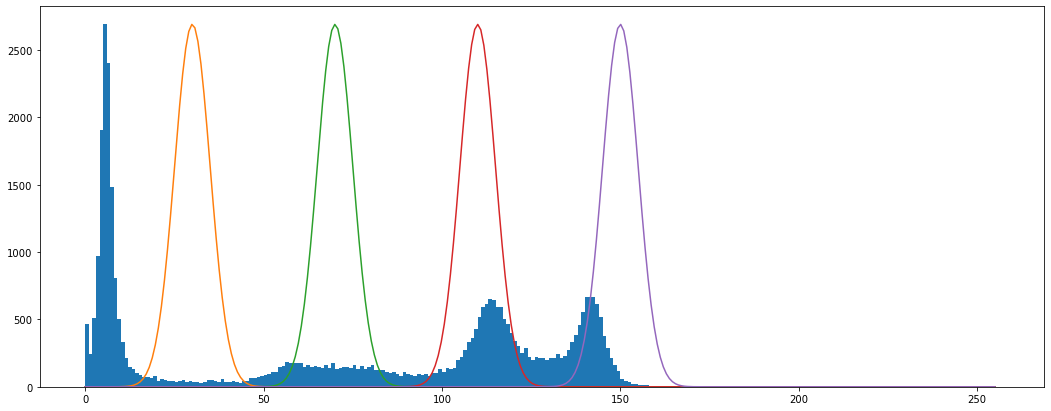

In [6]:
x=np.linspace(0,255,300)
hist, bin_edges=np.histogram(I.ravel(), bins=255)
fig1=plt.figure(figsize = (18,7))
b= plt.hist(I.ravel(),256,[0,256])
maxi=max(b[0])
for i in range(nm):
    pdf=normal_dist(x , med[i] , devstd[i])
    pdf=(pdf/max(pdf))*maxi
    plt.plot(x,pdf)
plt.show()

(4, 39277)
(4, 39277)
(4, 39277)
[  6.46122775  66.06396885 113.24675598 139.99257325]


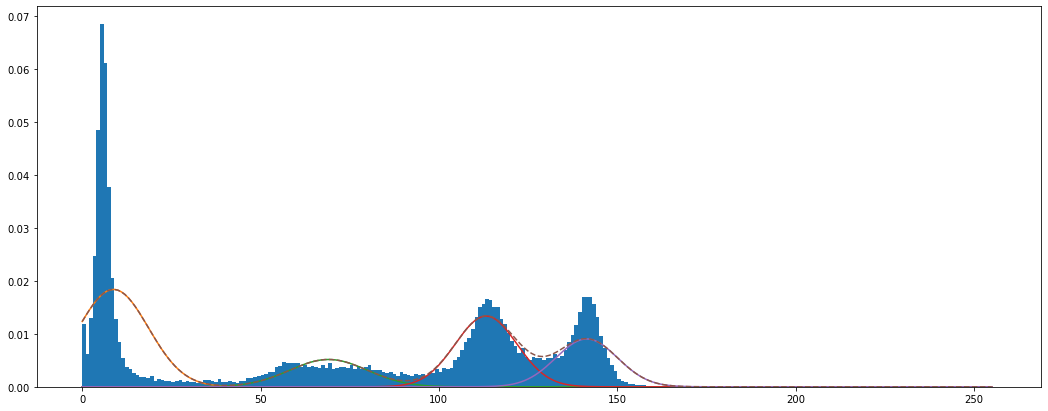

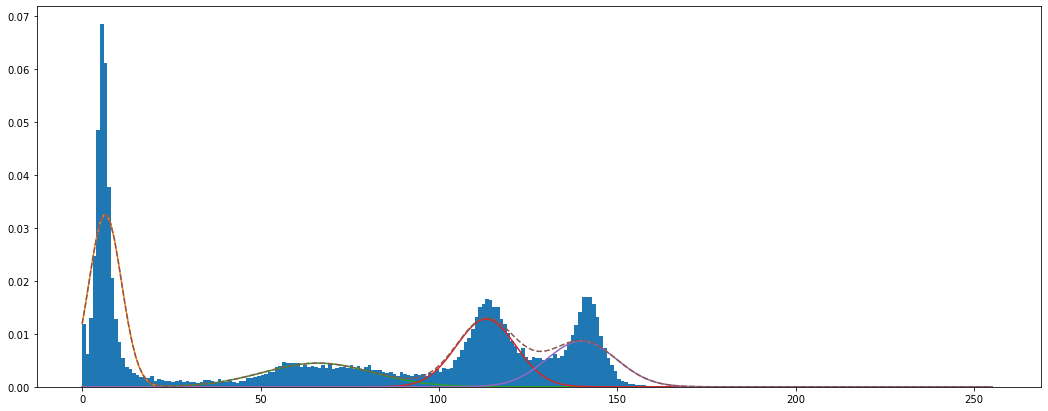

In [7]:
Ir=I.ravel()
Ir=Ir.astype(np.float)
lon=len(Ir)
pdf=np.zeros((nm,len(Ir)))
x=np.linspace(0,255,256)
for ite in range(3):
    gt=0;
    if (ite % 2) == 0:
        fig1=plt.figure(figsize = (18,7))
        plt.hist(I.ravel(),256,[0,256],density=True)
    for model in range(nm):
        pdf[model,:]=phi[model]*normal_dist(Ir , med[model] , devstd[model])
    pdft=np.sum(pdf,axis=0)
    print(pdf.shape)
    gamma=pdf/pdft
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        med[model]=np.dot(gamma[model,:],Ir)/suma
        devstd[model]=np.sqrt(np.dot(gamma[model,:],(Ir-med[model])**2)/suma)
        f=normal_dist(x , med[model] , devstd[model]);
        f=f/np.sum(f)
        g=phi[model]*f
        gt=g+gt;
        if (ite % 2)  ==  0:
            plt.plot(x,g)
    if (ite % 2)  ==  0:
        plt.plot(x,gt,'--')
print(med)
#    print(phi)
#    print(devstd)

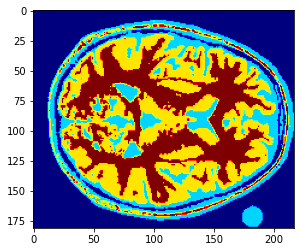

In [8]:
for model in range(nm):
    pdf[model,:]=phi[model]*normal_dist(Ir , med[model] , devstd[model])
Irt=np.argmax(pdf,axis=0)
# print(nf*nc)
#print(Irt.shape)
Irt=np.reshape(Irt, (nf, nc))   
plt.imshow(Irt,cmap='jet')